<h2> <center><strong>Ecole Polytechnique de Tunisie</strong> </center> </h2> !
<center> <img src="https://nhoues.github.io/Infrastructure-Project/Animations/EPT.jpg" style="width:80px; height:80px"  ></center>


<h1><center>Mini projet conception des systèmes d'information</center></h1>
<h1><em><center>Problème de détection de fraud STEG : Partie Machine Learning</em></center></h1>
<h3><center><em>Réalisé par :</em> <font color='blue'> Naim Houes & Malek Mechergui</font></center></h3> 


Dans cette partie du mini-projet, nous nous sommes basés sur ce notebook ([lien vers le notebook](https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets/notebook)) de la compétion de Credit Card Fraud Detection sur Kaggle. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import statistics 
from tqdm.notebook import tqdm 
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings

# Classifier Libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
import collections


warnings.filterwarnings('ignore')
%matplotlib inline
tqdm.pandas()
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
ML_train = pd.read_csv('/content/drive/My Drive/colab/train_client.csv')
ML_test = pd.read_csv('/content/drive/My Drive/colab/test_client.csv')

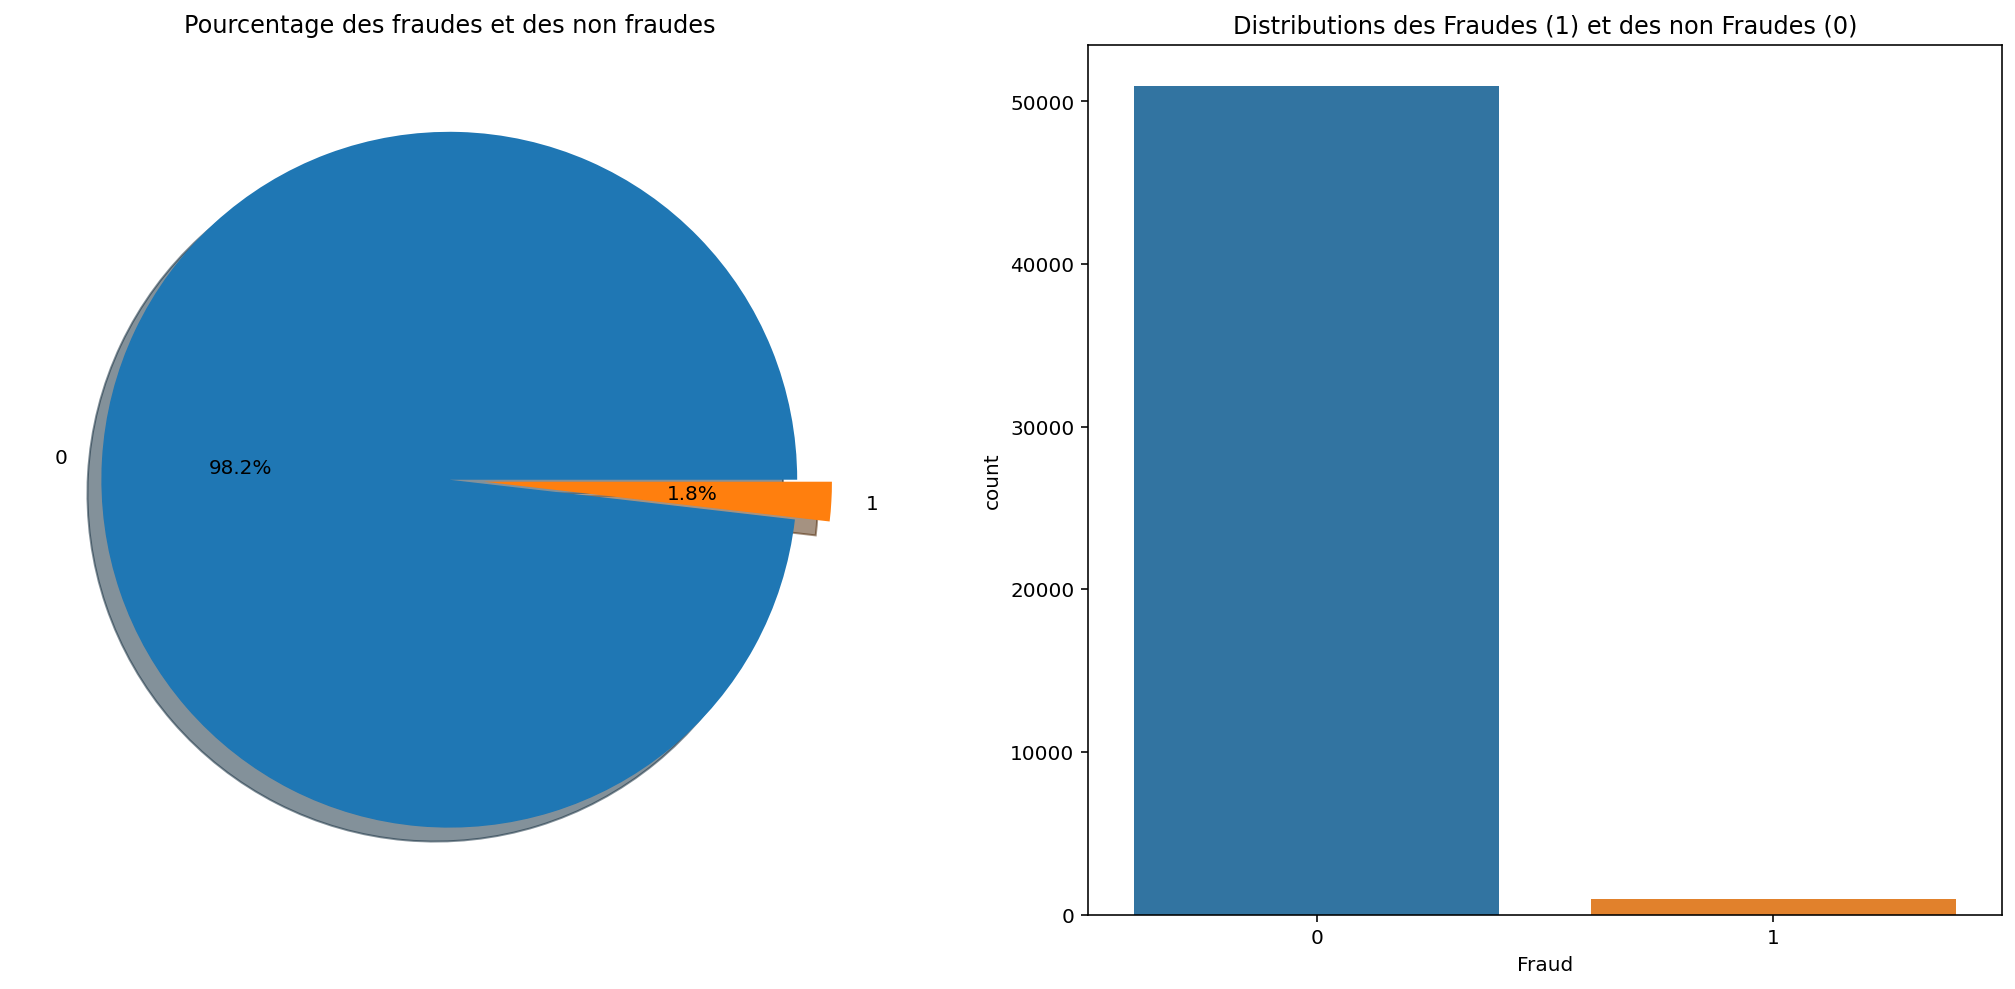

In [3]:
f,ax=plt.subplots(1,2,figsize=(18,8))

ML_train['Fraud'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Pourcentage des fraudes et des non fraudes')
ax[0].set_ylabel('')
sns.countplot('Fraud',data=ML_train,ax=ax[1])
ax[1].set_title('Distributions des Fraudes (1) et des non Fraudes (0)')
plt.show()


In [4]:
ML_train.isnull().sum().sum()

0

In [5]:
ML_train.columns

Index(['client_id', 'district', 'client_catg', 'region', 'creation', 'Fraud',
       'how_many_counter', 'counter_number', 'end', 'mean_consumption',
       'min_consumption', 'std_consumption', 'max_consumption',
       'mean_quarter1', 'mean_quarter2', 'mean_quarter3', 'mean_quarter4',
       'min_quarter1', 'min_quarter2', 'min_quarter3', 'min_quarter4',
       'max_quarter1', 'max_quarter2', 'max_quarter3', 'max_quarter4',
       'num_observ', 'var_consumption', 'q25', 'q75', 'q10', 'q90',
       'Range_consump', 'Q', 'CD', 'BSD', 'VD', 'CDq'],
      dtype='object')

In [0]:
L_features = ['client_id', 'district', 'client_catg', 'region', 'Fraud', 'num_observ',
                     'end', 'mean_consumption','min_consumption', 'std_consumption', 'max_consumption',
                    'mean_quarter1', 'mean_quarter2', 'mean_quarter3', 'mean_quarter4',
                    'min_quarter1', 'min_quarter2', 'min_quarter3', 'min_quarter4',
                    'max_quarter1', 'max_quarter2', 'max_quarter3', 'max_quarter4',
                      'var_consumption', 'q25', 'q75', 'q10', 'q90',
                      'Range_consump', 'Q', 'CD', 'BSD', 'VD', 'CDq']

In [0]:
ML_train = ML_train[L_features]
ML_test = ML_test[L_features]

# Modèles de classification sur des données non equilibrés

In [0]:
X_train = ML_train.drop(['Fraud'], axis=1)
y_train = ML_train['Fraud']

X_test = ML_test.drop(['Fraud'], axis=1)
y_test = ML_test['Fraud']

Nous avons utilisés les modèles de classifications suivant :

In [0]:
classifiers = { "LogisiticRegression": LogisticRegression(),
                "XGB Classifier" : xgb.XGBClassifier( n_estimators=4000,
                                                      max_depth=10, 
                                                      learning_rate=0.014, 
                                                      subsample=0.8,
                                                      colsample_bytree=0.4, 
                                                      missing=-1, 
                                                      eval_metric='auc',
                                                      # USE CPU
                                                      nthread=4,
                                                      #tree_method='hist' 
                                                      #USE GPU
                                                      tree_method='gpu_hist'),     
                "LGBM Classifier" : lgb.LGBMClassifier( max_bin = 63,
                                                        num_leaves = 255,
                                                        num_iterations = 4000,
                                                        learning_rate = 0.02,
                                                        tree_learner = 'serial',
                                                        task = 'train',
                                                        min_data_in_leaf = 1,
                                                        min_sum_hessian_in_leaf = 100,
                                                        sparse_threshold=1.0,
                                                        tree_method='gpu_hist' ,
                                                        num_thread = -1,
                                                        seed= 42,
                                                        feature_fraction_seed = 42,
                                                        bagging_seed = 42,
                                                        drop_seed = 42,
                                                        data_random_seed = 42,
                                                        objective = 'binary',
                                                        boosting_type = 'gbdt',
                                                        metric = 'auc',
                                                        is_unbalance = False),
                "Random Forest Classifier":RandomForestClassifier() }

In [10]:
from sklearn.model_selection import cross_val_score

Models = {}

for key, classifier in classifiers.items():
    Models[key] = classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "a un score de précision du training de", round(training_score.mean(), 2) * 100)

Classifiers:  LogisticRegression a un score de précision du training de 98.0
Classifiers:  XGBClassifier a un score de précision du training de 98.0
Classifiers:  LGBMClassifier a un score de précision du training de 98.0
Classifiers:  RandomForestClassifier a un score de précision du training de 98.0


Dans la partie train nous avons obtenus de très bon accuracies ce qui n'est pas un résultat satisfaint. En effet, c'est normale que les modèles de classification appliquées à une telle dataset non equilibrée (98% de la dataset non fraudeurs) fassent des prédictions naïves et donc avoir un bon score. On peut dire que l'accuracy n'est pas une métrique fiable.

In [11]:
from sklearn.metrics import roc_auc_score

predictions = []

for key, model in Models.items():
  
  y_pred = model.predict_proba(X_test)
  predictions.append(list(y_pred[:,1]))
  print("Classifiers: ",key, "a un score AUC de test de ", roc_auc_score(y_test, y_pred[:,1]))

Classifiers:  LogisiticRegression a un score AUC de test de  0.29324596299882244
Classifiers:  XGB Classifier a un score AUC de test de  0.8070115621224683
Classifiers:  LGBM Classifier a un score AUC de test de  0.8226926948618901
Classifiers:  Random Forest Classifier a un score AUC de test de  0.8007374522773345


Dans la partie test aussi les scores étaient plus au moins acceptables pour la plupart (sauf pour la Linear Regression) ce qui n'est vrai en réalité car on a des fradeurs dans la data.

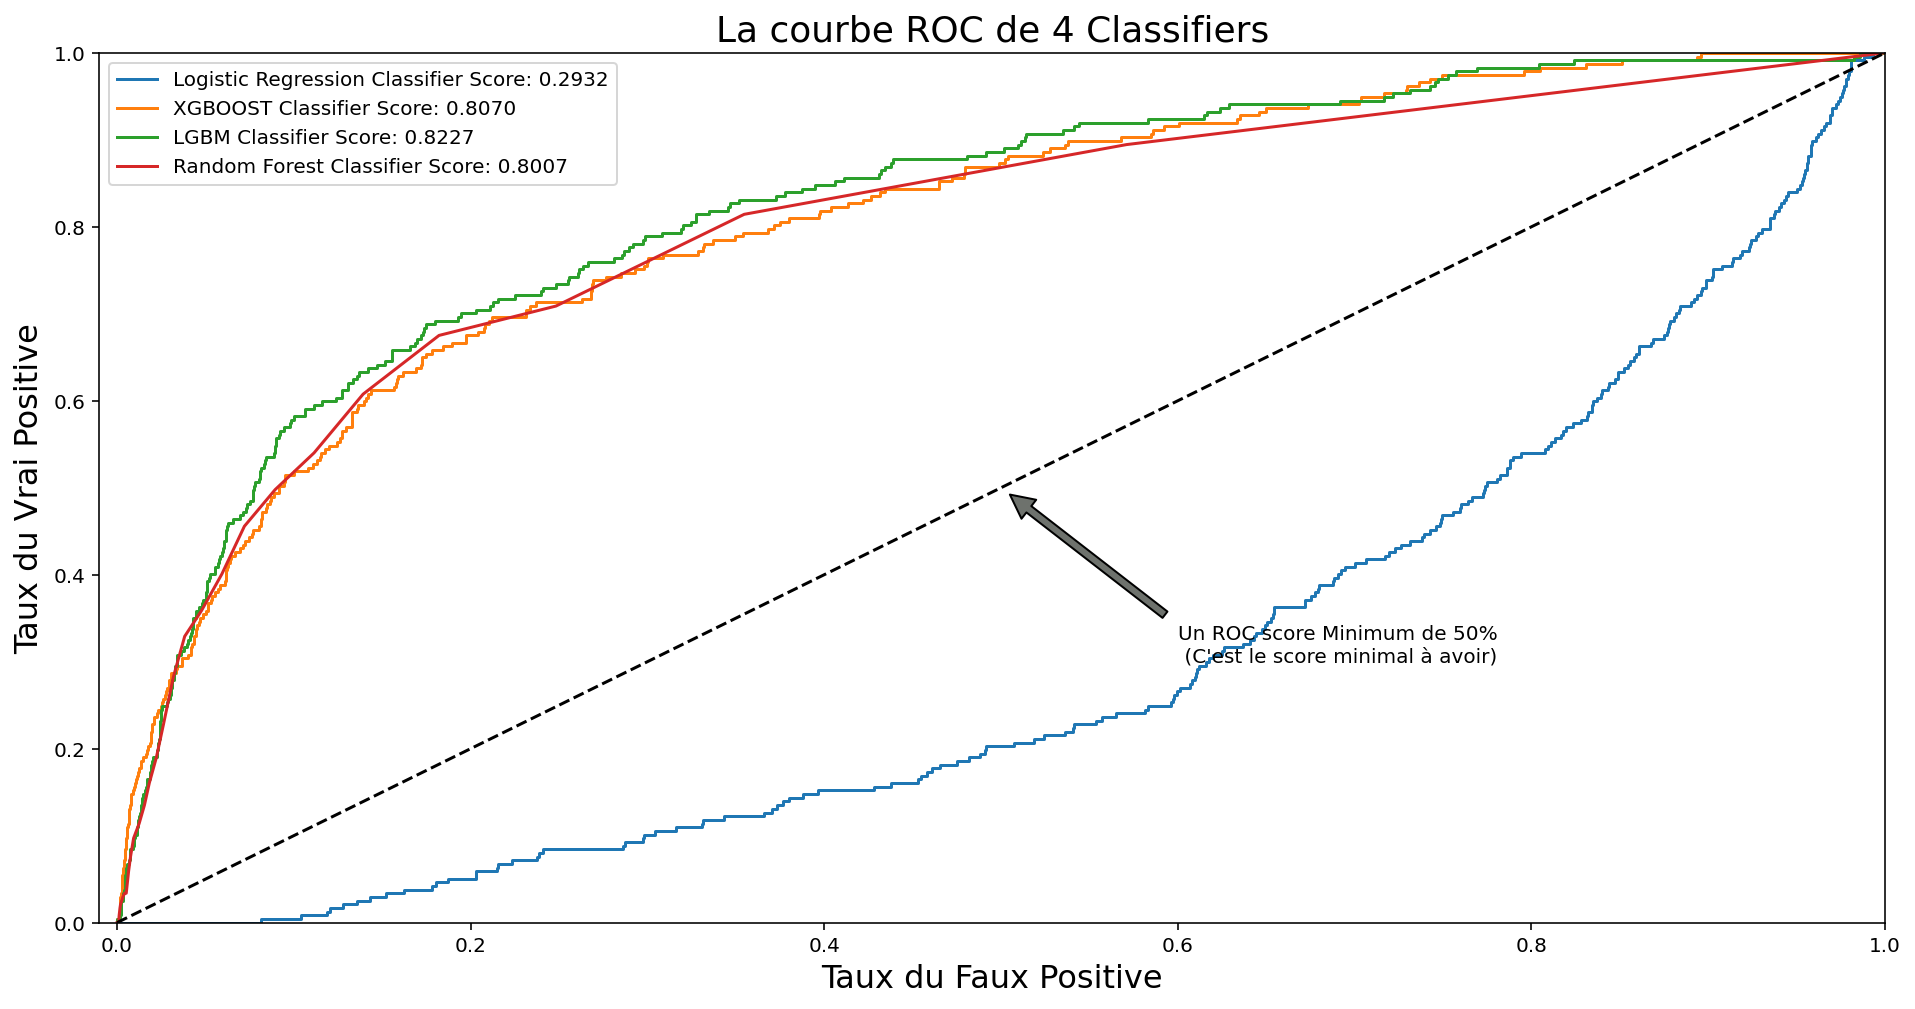

In [12]:
from sklearn.metrics import roc_curve

log_fpr, log_tpr, log_thresold = roc_curve(y_test, predictions[0])
xgb_fpr, xgb_tpr, xgb_threshold = roc_curve(y_test, predictions[1])
lgbm_fpr, lgbm_tpr, lgbm_threshold = roc_curve(y_test, predictions[2])
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test, predictions[3])


def graph_roc_curve_multiple(log_fpr, log_tpr, xgb_fpr, xgb_tpr, lgbm_fpr, lgbm_tpr, rf_fpr, rf_tpr):
    plt.figure(figsize=(16,8))
    plt.title('La courbe ROC de 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test,predictions[0])))
    plt.plot(xgb_fpr, xgb_tpr, label='XGBOOST Classifier Score: {:.4f}'.format(roc_auc_score(y_test,predictions[1])))
    plt.plot(lgbm_fpr, lgbm_tpr, label='LGBM Classifier Score: {:.4f}'.format(roc_auc_score(y_test,predictions[2])))
    plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_test,predictions[3])))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('Taux du Faux Positive', fontsize=16)
    plt.ylabel('Taux du Vrai Positive', fontsize=16)
    plt.annotate("Un ROC score Minimum de 50% \n (C'est le score minimal à avoir)", xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()


graph_roc_curve_multiple(log_fpr, log_tpr, xgb_fpr, xgb_tpr, lgbm_fpr, lgbm_tpr, rf_fpr, rf_tpr)
plt.show()


La courbe ROC ci dessus trace le taux de vrais positifs en fonction du taux de faux positifs. C'est un graphique représentant les performances de nos modèles de classification pour tous les seuils de classification. En fait, diminuer la valeur du seuil de classification permet de classer plus d'éléments comme positifs, ce qui augmente le nombre de faux positifs et de vrais positifs.
Ceci on peut le voir avec les matrices de confusions.

**Matrice de confusion**

In [0]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,precision_recall_curve,roc_curve

def conf_matrix(y_pred,y_test) : 
  
  fig, ax = plt.subplots(2,2,figsize=(20,20))
  conf_matrix = confusion_matrix(y_test, (y_pred>0.1).astype(int))
  sns.heatmap(conf_matrix, ax=ax[0][0], annot=True)
  ax[0, 0].set_title("Matrice de confusion \n seuil = 0.1", fontsize=14)
  ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
  ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)
 
  conf_matrix = confusion_matrix(y_test, (y_pred>0.4).astype(int))
  sns.heatmap(conf_matrix, ax=ax[0][1], annot=True)
  ax[0][1].set_title("Matrice de confusion \n seuil = 0.4", fontsize=14)
  ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
  ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)
 
  conf_matrix = confusion_matrix(y_test, (y_pred>0.6).astype(int))
  sns.heatmap(conf_matrix, ax=ax[1][0], annot=True)
  ax[1][0].set_title("Matrice de confusion \n seuil = 0.7", fontsize=14)
  ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
  ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)
 
  conf_matrix = confusion_matrix(y_test, (y_pred>0.8).astype(int))
  sns.heatmap(conf_matrix, ax=ax[1][1], annot=True)
  ax[1][1].set_title("Matrice de confusion \n seuil = 0.9", fontsize=14)
  ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
  ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)
  plt.show()


Nous avons considérer le modèle de classification ayant le meilleur score (LGBM) pour dessiner les matrices de confusion et pour afficher le rapport de classfication.

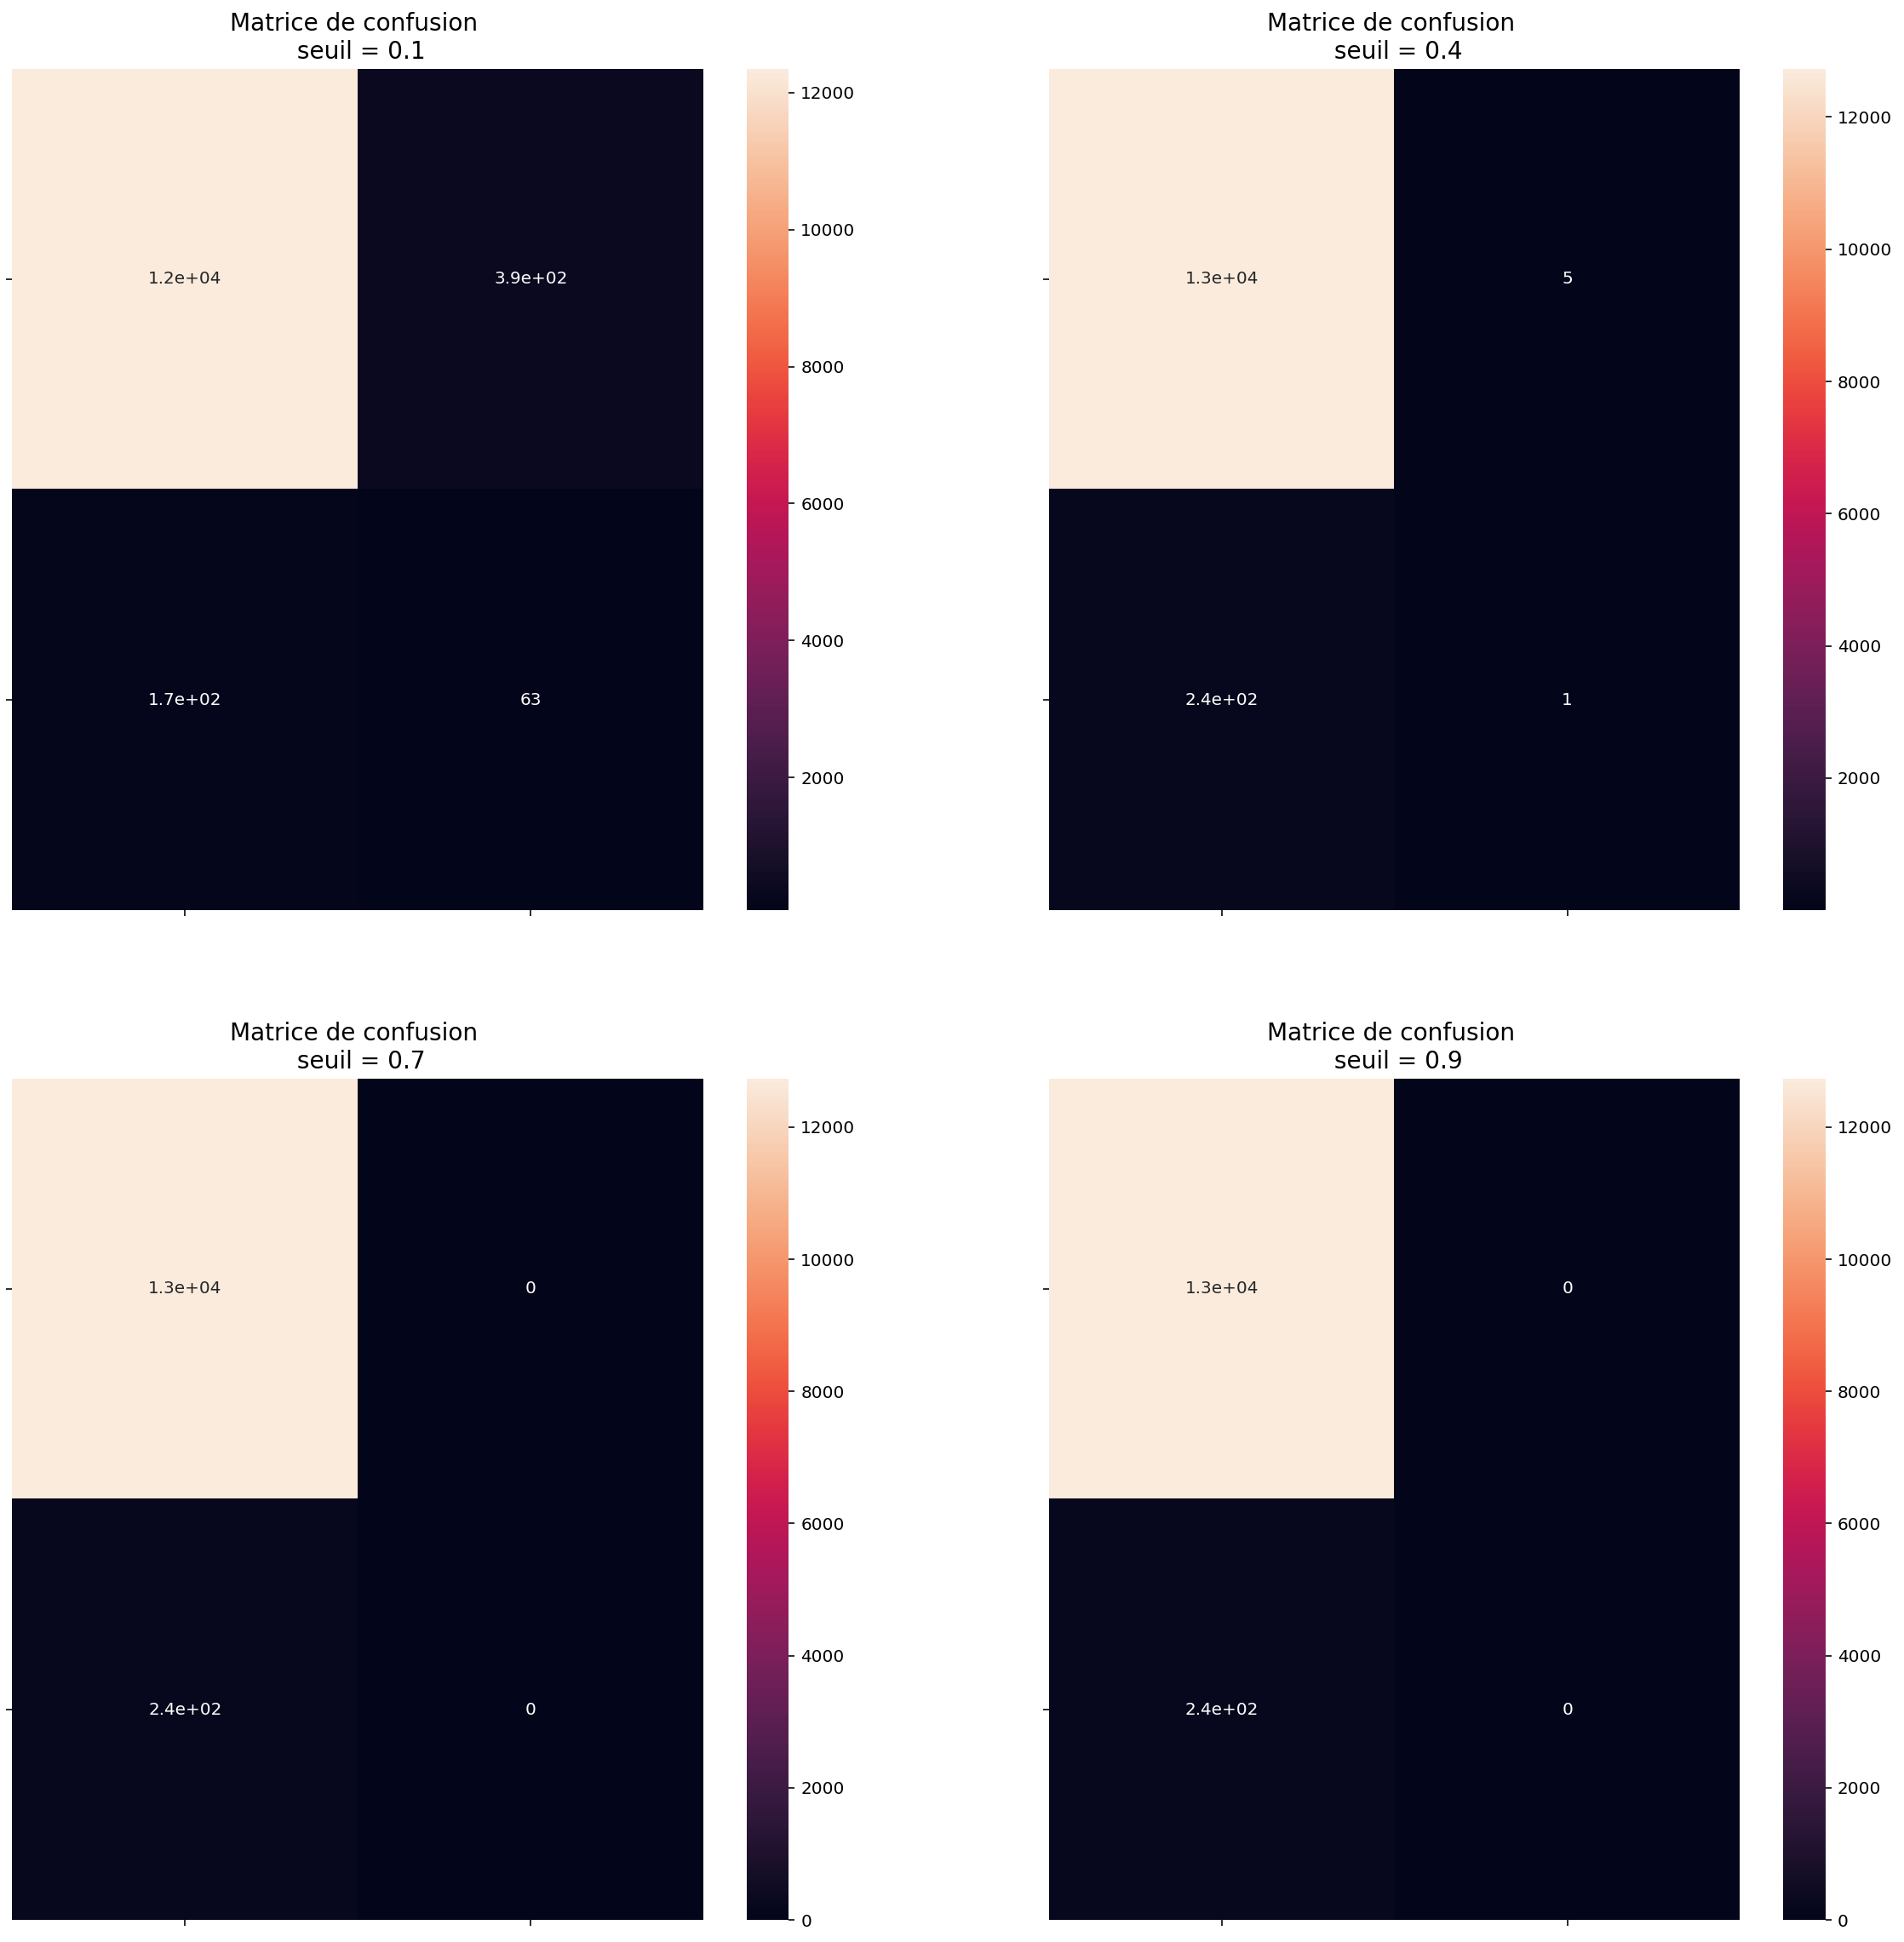

In [14]:
conf_matrix(np.array(predictions[2]), y_test) 

In [15]:
print(classification_report(y_test, (np.array(predictions[2])>0.5).astype(int)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12734
           1       0.00      0.00      0.00       237

    accuracy                           0.98     12971
   macro avg       0.49      0.50      0.50     12971
weighted avg       0.96      0.98      0.97     12971



Les résultats du rapport confirment que malgré les bons résultats que nous avons eu en parties train et test. Notre modèle n'a malheuresuement réussi à détecter aucun des fraudeurs. En fait, la précision est de 98% pour la classe des non fraudeurs et de 0% pour la classe des fraudeurs c-à-d sur 100 clients dont 2 sont fraudeurs notre modèle prédit les 100 en tant que non fraudeurs. 
Le recall est également de 0% pour la classe des fraudeurs et de 100% pour les non fraudeurs c-à-d que le modèle réussi à determiner parfaitement tous les non fraudeurs mais aucun des fraudeurs.

Dans les parties qui suivent, nous allons considérer les deux modèles avec les meilleurs scores (XGB et LGBM).

# Modèles de classification sur des données "Under Sampled" (Sous échantillonées)

In [0]:
df_train, df_valid = train_test_split(ML_train, test_size=0.2, random_state=42)

In [0]:
nb_fraud = df_train['Fraud'].value_counts()[1]

In [18]:
df_train = df_train.sample(frac=1)

fraud_df = df_train.loc[df_train['Fraud'] == 1]
non_fraud_df = df_train.loc[df_train['Fraud'] == 0][:nb_fraud]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,client_id,district,client_catg,region,Fraud,num_observ,end,mean_consumption,min_consumption,std_consumption,max_consumption,mean_quarter1,mean_quarter2,mean_quarter3,mean_quarter4,min_quarter1,min_quarter2,min_quarter3,min_quarter4,max_quarter1,max_quarter2,max_quarter3,max_quarter4,var_consumption,q25,q75,q10,q90,Range_consump,Q,CD,BSD,VD,CDq
16017,217986020,69,11,105,1,32,2019,249.998047,98.5,78.686025,479.50,282.856250,224.837500,245.285714,241.200000,205.25,157.75,98.5000,145.25,402.0625,365.00,479.50,282.50,6191.490545,203.81250,273.1250,172.75,359.875,1.318339,34.656250,0.145328,0.314747,24.766156,0.351326
6443,215507580,69,11,103,1,22,2019,226.892045,0.0,161.972276,531.25,187.625000,180.025000,281.612500,226.892045,160.00,0.00,0.0000,0.00,215.2500,485.50,531.25,531.25,26235.018297,147.78125,312.5625,3.60,479.125,2.000000,82.390625,0.357953,0.713874,115.627757,0.985085
46749,231100160,63,11,311,0,39,2019,211.865385,41.0,208.578080,1289.00,168.000000,329.288462,154.285714,131.750000,42.50,53.00,45.2500,41.00,272.0000,1289.00,343.25,398.25,43504.815283,108.87500,273.3750,51.45,354.250,1.876692,82.250000,0.430347,0.984484,205.341780,0.746364
51286,3912800,60,11,101,1,23,2016,87.616848,0.0,59.671866,271.25,73.722222,61.300000,116.131944,87.616848,0.00,32.00,5.6875,0.00,111.2500,97.75,271.25,271.25,3560.731642,41.87500,109.5000,24.40,142.400,2.000000,33.812500,0.446738,0.681055,40.639805,0.707434
18725,231615890,63,11,311,0,11,2019,86.659091,27.5,38.686928,161.00,89.312500,54.000000,126.666667,86.659091,55.50,27.50,102.5000,27.50,130.0000,73.50,161.00,161.00,1496.678409,58.50000,109.5000,53.50,130.000,1.416446,25.500000,0.303571,0.446427,17.270876,0.416894


Distribution des fraudes dans le sous échantillon
1    0.5
0    0.5
Name: Fraud, dtype: float64


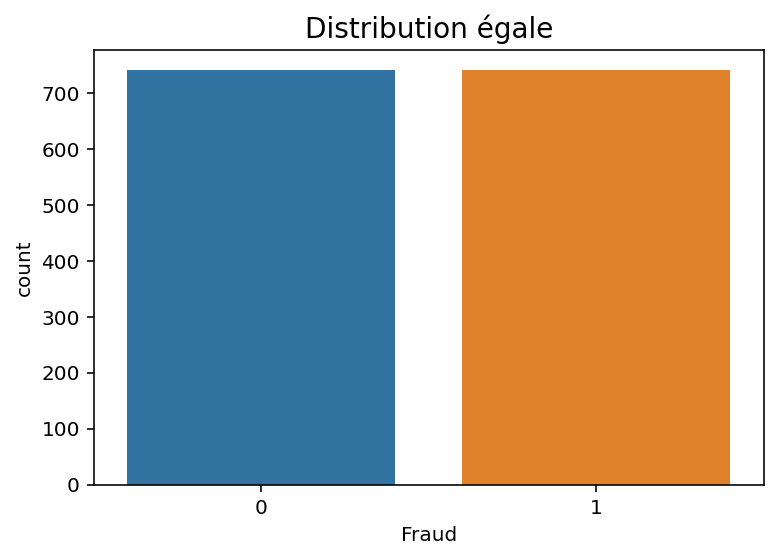

In [19]:
print('Distribution des fraudes dans le sous échantillon')
print(new_df['Fraud'].value_counts()/len(new_df))


sns.countplot('Fraud', data=new_df)
plt.title('Distribution égale', fontsize=14)
plt.show()

In [0]:
X_train = new_df.drop('Fraud', axis=1)
y_train = new_df['Fraud']

X_val = df_valid.drop('Fraud', axis=1)
y_val = df_valid['Fraud']

In [21]:
clf1 = xgb.XGBClassifier( 
        n_estimators=4000,
        max_depth=10, 
        learning_rate=0.014, 
        subsample=0.8,
        colsample_bytree=0.4, 
        missing=-1, 
        eval_metric='auc',
        # USE CPU
        nthread=4,
        #tree_method='hist' 
        # USE GPU
        tree_method='gpu_hist'  )
    
model1 = clf1.fit(X_train,  y_train, eval_set=[(X_val,y_val)], verbose=50, early_stopping_rounds=100)


[0]	validation_0-auc:0.657089
Will train until validation_0-auc hasn't improved in 100 rounds.
[50]	validation_0-auc:0.802971
[100]	validation_0-auc:0.806969
[150]	validation_0-auc:0.807643
[200]	validation_0-auc:0.809327
[250]	validation_0-auc:0.810252
[300]	validation_0-auc:0.810899
[350]	validation_0-auc:0.811237
[400]	validation_0-auc:0.810425
Stopping. Best iteration:
[320]	validation_0-auc:0.811661



In [22]:
clf2 = lgb.LGBMClassifier(
    max_bin = 63,
    num_leaves = 255,
    num_iterations = 4000,
    learning_rate = 0.02,
    tree_learner = 'serial',
    task = 'train',
    min_data_in_leaf = 1,
    min_sum_hessian_in_leaf = 100,
    sparse_threshold=1.0,
    tree_method='gpu_hist' ,
    num_thread = -1,
    seed= 42,
    feature_fraction_seed = 42,
    bagging_seed = 42,
    drop_seed = 42,
    data_random_seed = 42,
    objective = 'binary',
    boosting_type = 'gbdt',
    metric = 'auc',
    is_unbalance = False,
)
model2 = clf2.fit(X_train, y_train, eval_set=[(X_val,y_val)],
        verbose=50, early_stopping_rounds=100)


Training until validation scores don't improve for 100 rounds.
[50]	valid_0's auc: 0.759032
[100]	valid_0's auc: 0.766427
[150]	valid_0's auc: 0.77294
[200]	valid_0's auc: 0.775023
[250]	valid_0's auc: 0.776107
[300]	valid_0's auc: 0.777383
[350]	valid_0's auc: 0.778268
[400]	valid_0's auc: 0.778777
[450]	valid_0's auc: 0.778704
[500]	valid_0's auc: 0.778686
Early stopping, best iteration is:
[429]	valid_0's auc: 0.778998


In [0]:
X = ML_test.drop('Fraud', axis=1)
y = ML_test['Fraud']

In [24]:
from sklearn.metrics import roc_auc_score

y_pred1 = model1.predict_proba(X)
y_pred2 = model2.predict_proba(X)

score1 = roc_auc_score(y, y_pred1[:,1])
score2 = roc_auc_score(y, y_pred2[:,1])

print("XGBClassifier : ", score1)
print("LGBMClassifier : ", score2)

XGBClassifier :  0.827349154627069
LGBMClassifier :  0.8132195676679397


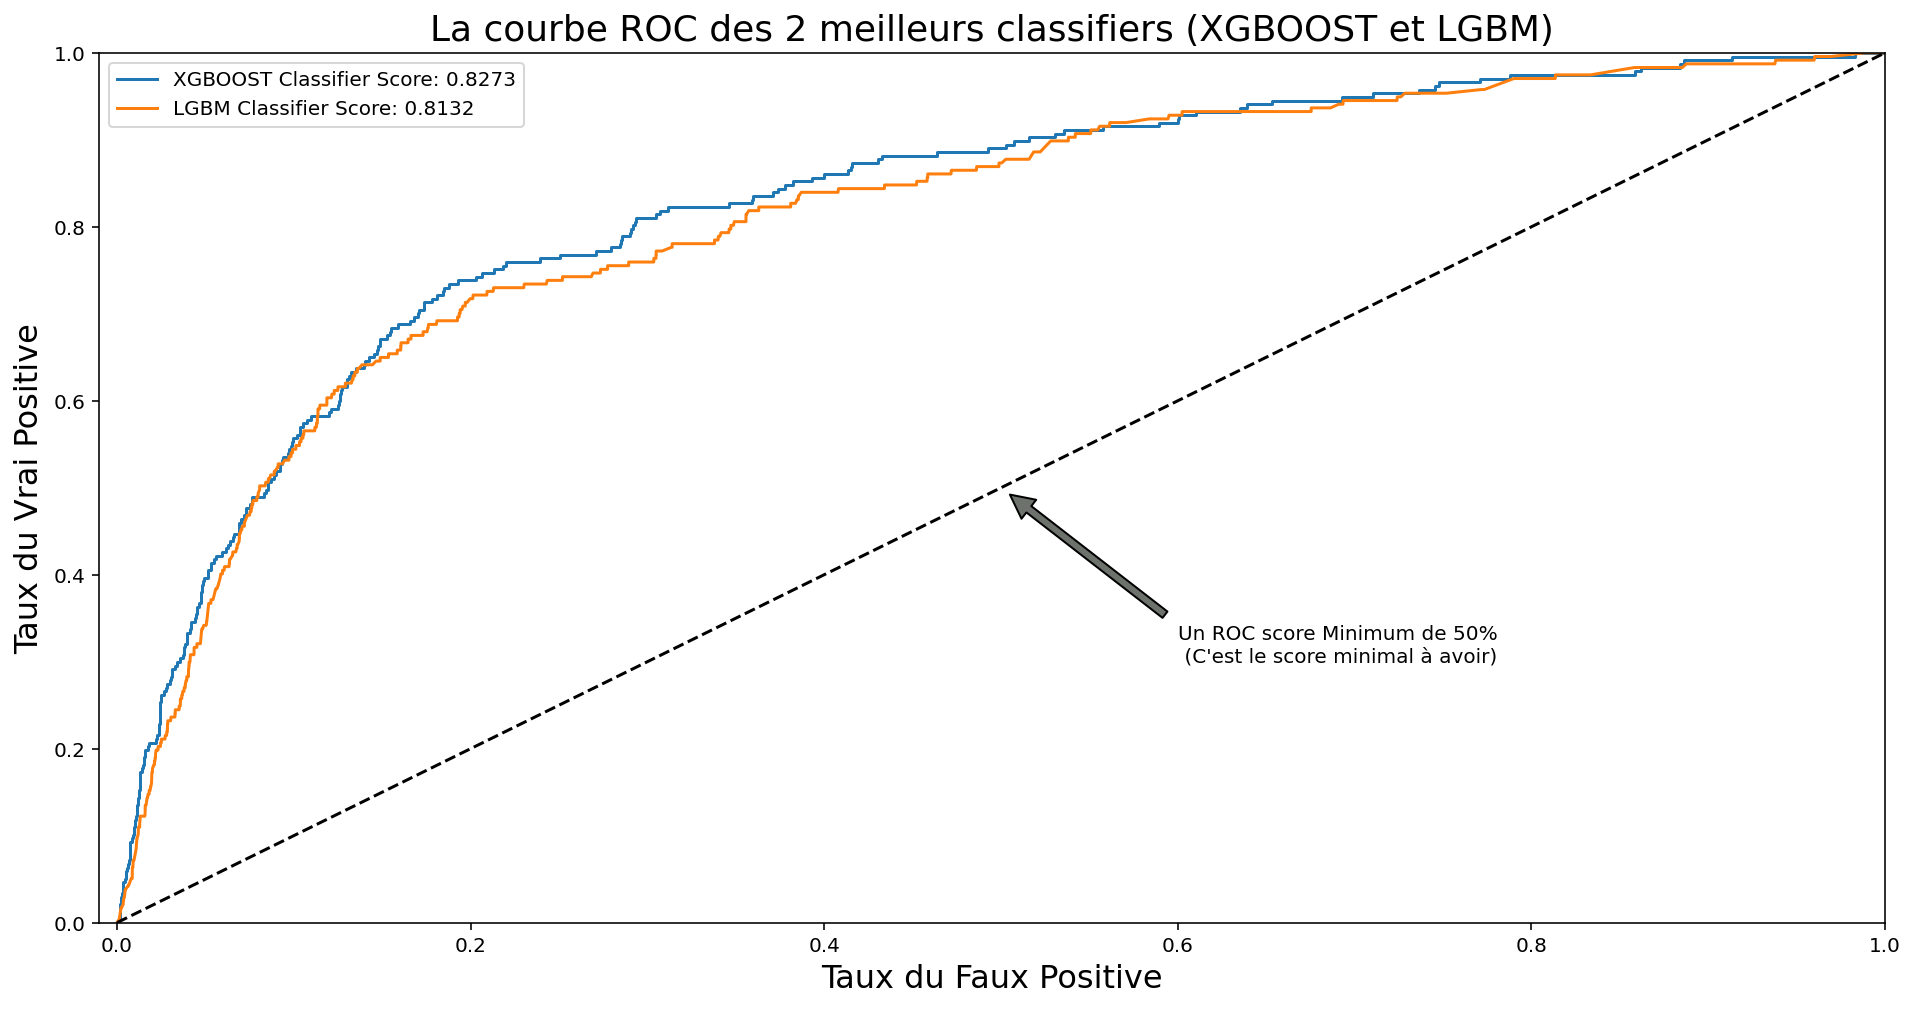

In [25]:
from sklearn.metrics import roc_curve

xgb_fpr, xgb_tpr, xgb_threshold = roc_curve(y_test, y_pred1[:,1])
lgbm_fpr, lgbm_tpr, lgbm_threshold = roc_curve(y_test, y_pred2[:,1])



def graph_roc_curve_double(xgb_fpr, xgb_tpr, lgbm_fpr, lgbm_tpr):
    plt.figure(figsize=(16,8))
    plt.title('La courbe ROC des 2 meilleurs classifiers (XGBOOST et LGBM)', fontsize=18)
    plt.plot(xgb_fpr, xgb_tpr, label='XGBOOST Classifier Score: {:.4f}'.format(score1))
    plt.plot(lgbm_fpr, lgbm_tpr, label='LGBM Classifier Score: {:.4f}'.format(score2))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('Taux du Faux Positive', fontsize=16)
    plt.ylabel('Taux du Vrai Positive', fontsize=16)
    plt.annotate("Un ROC score Minimum de 50% \n (C'est le score minimal à avoir)", xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()


graph_roc_curve_double(xgb_fpr, xgb_tpr, lgbm_fpr, lgbm_tpr)
plt.show()


La courbe ROC ci dessus montre l'évolution du taux de vrais positifs en fonction du taux de faux positifs. Les deux modèles réussisent à classifier avec des scores presque égaux (les deux courbes sont presque confondues).

On va dessiner et calculer les differents paramètres du rapport de classification pour le modèle avec le meilleur score (XGB).

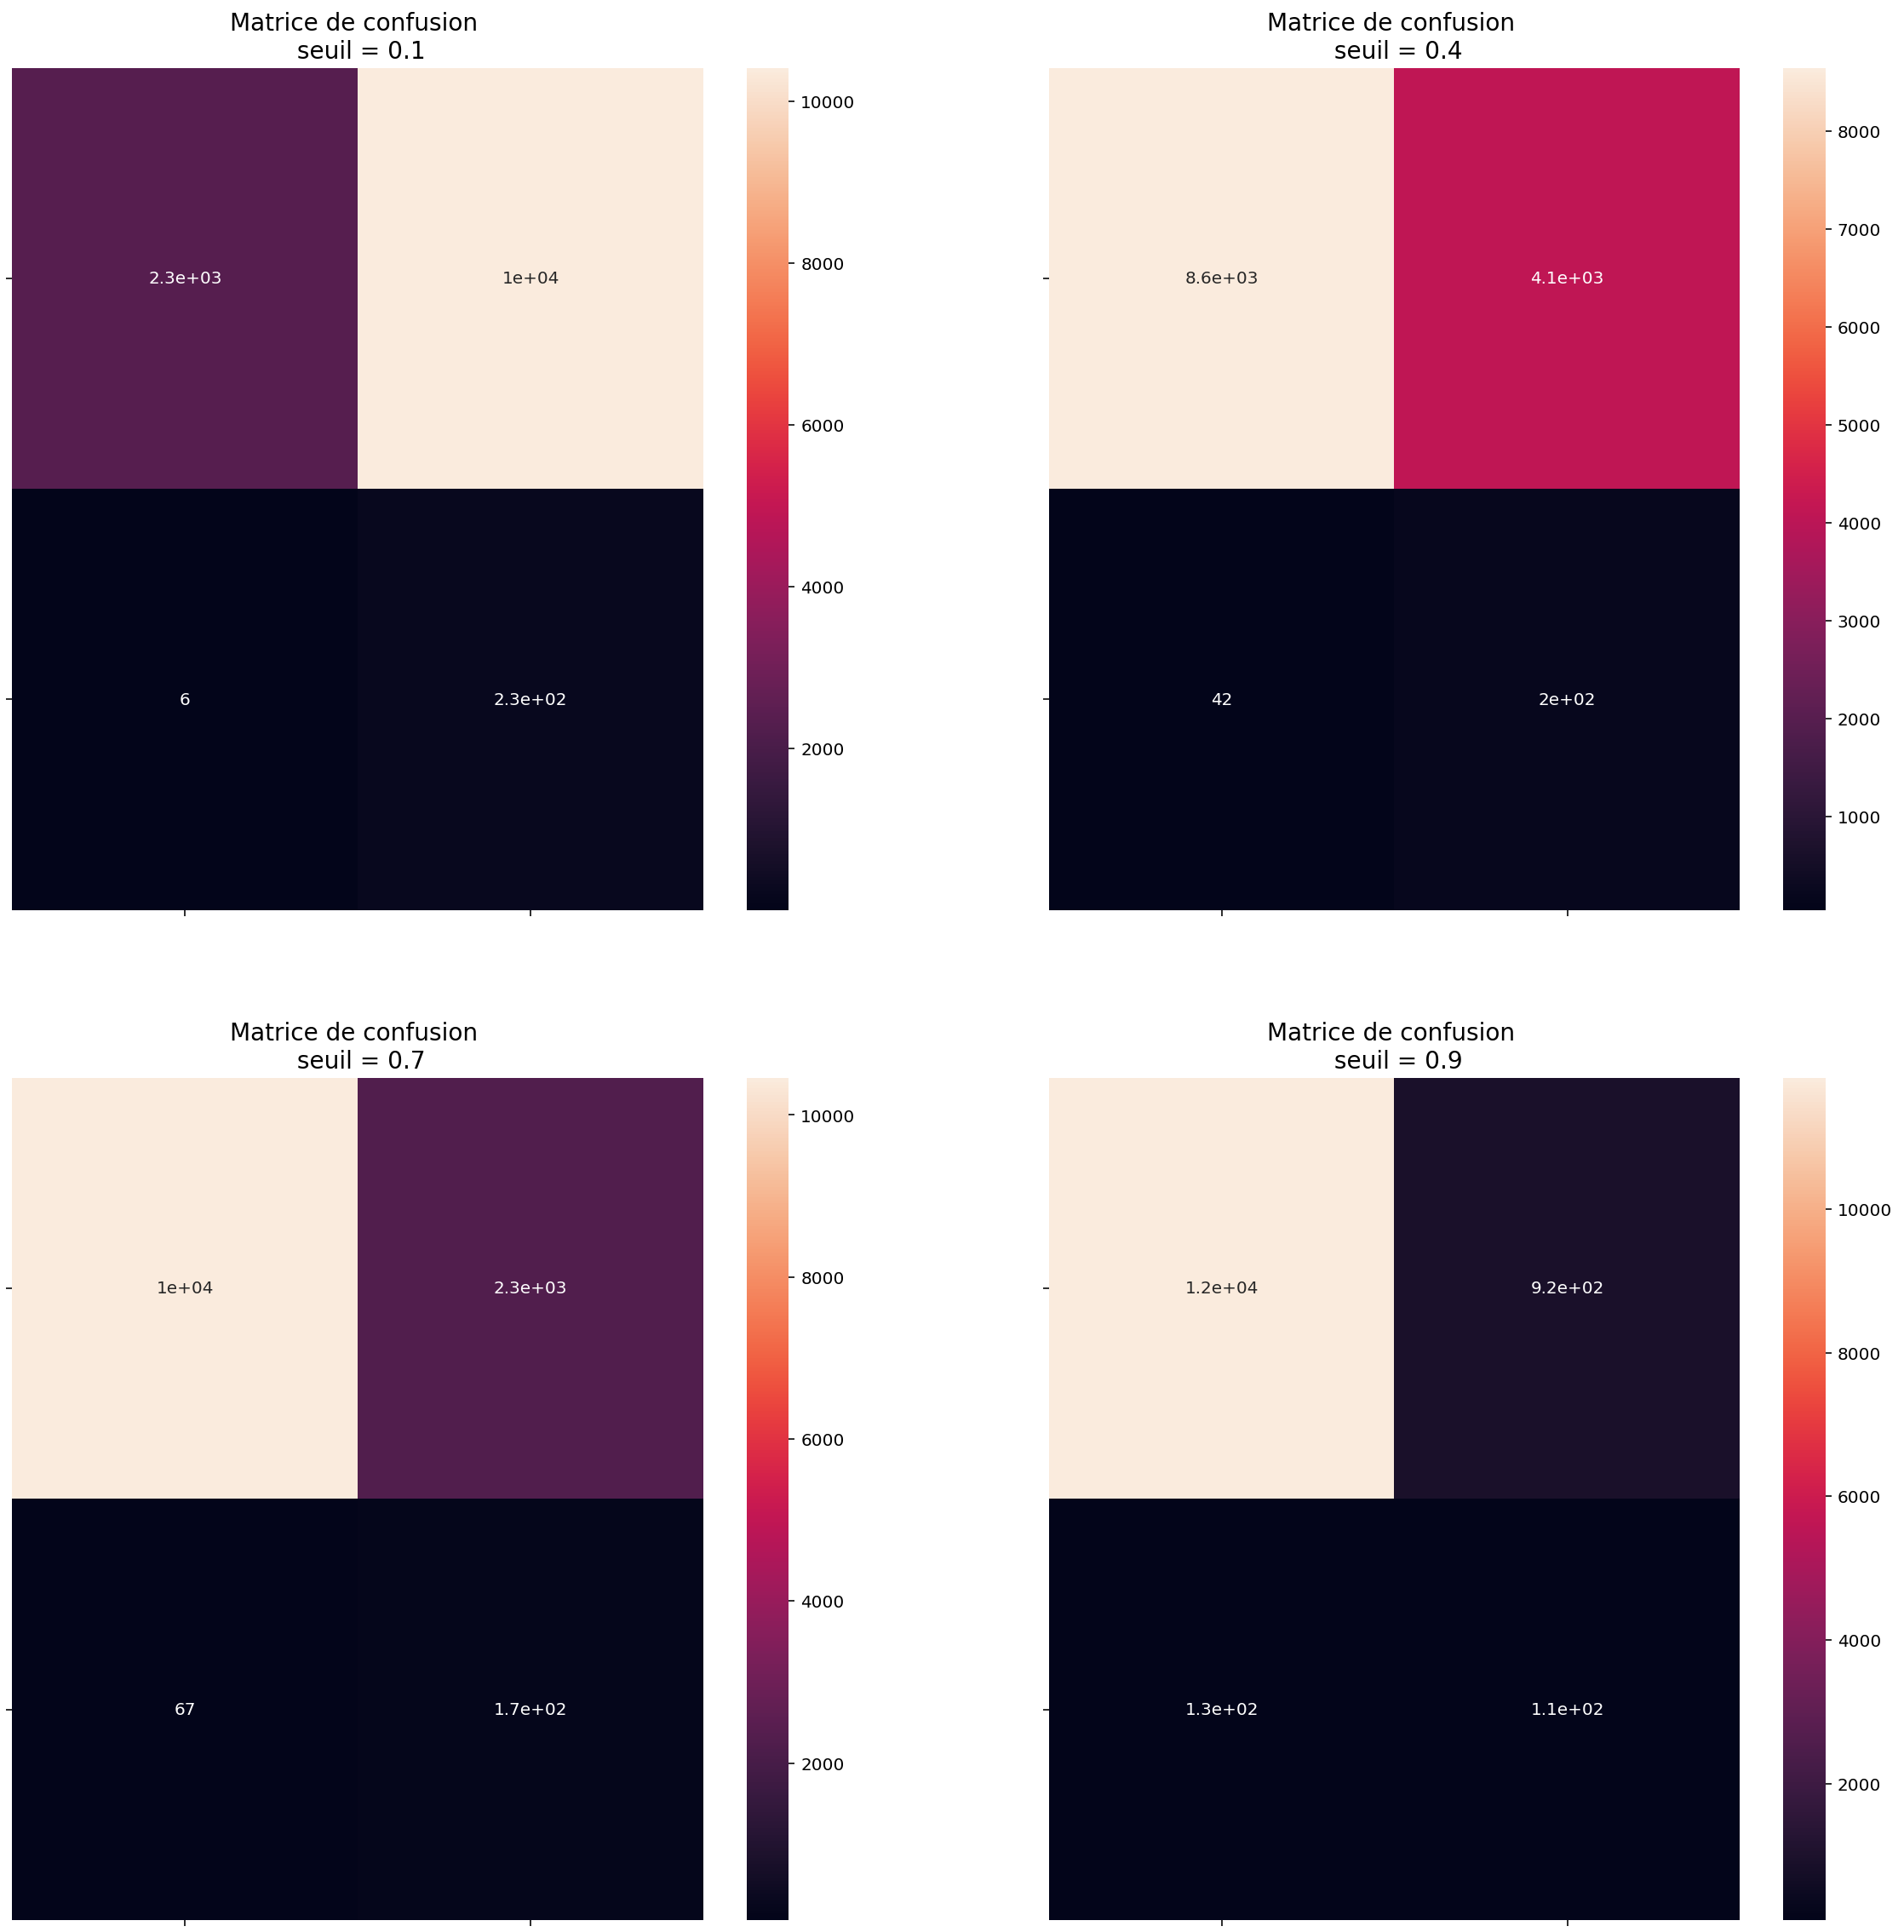

In [26]:
conf_matrix(y_pred1[:,1],y_test)

In [27]:
print(classification_report(y_test, (y_pred1[:,1]>0.5).astype(int)))

              precision    recall  f1-score   support

           0       0.99      0.75      0.86     12734
           1       0.05      0.76      0.10       237

    accuracy                           0.75     12971
   macro avg       0.52      0.76      0.48     12971
weighted avg       0.98      0.75      0.84     12971



Notre modèle a pu détecter 74% du total des fraudeurs de la partie teste avec un seuil de probabilité de 0.5. Mais en ce qui concerne la précision elle est très faible (6%) c-à-d sur 100 clients détéctés fraudeurs on a que 6 qui le sont vraiment. Dans le cas de la STEG ceci n'est pas une véritable problematique car la societé cherche à déterminer les clients fraudeurs à tout prix. Enfait, la détermination actuelle des fraudeurs se fait aléatoirement.

In [28]:
import gc 
gc.collect()

18446

# Modèles de classification sur des données "Over Sampled" (Sur échantillonées)

In [0]:
df_train, df_valid = train_test_split(ML_train, test_size=0.2, random_state=42)

In [0]:
from imblearn.over_sampling import SMOTE
X = df_train.drop('Fraud', axis=1)
y = df_train['Fraud']
X_resampled, y_resampled = SMOTE().fit_resample(X, y)


Distribution des fraudes dans le sur échantillon


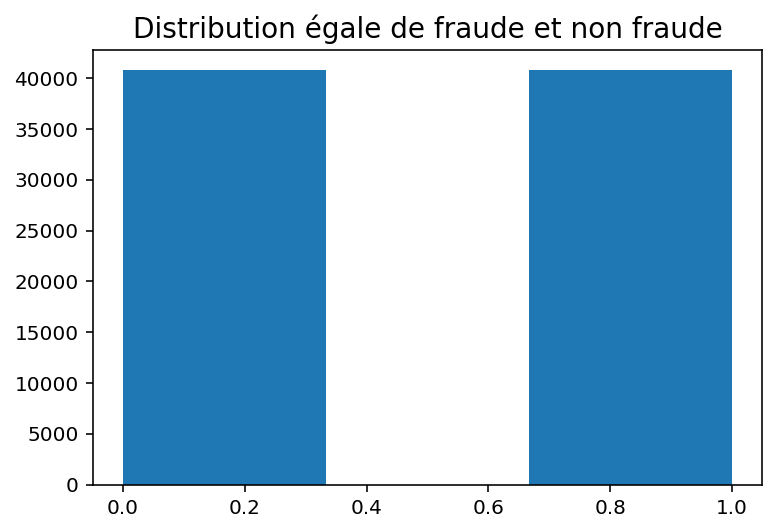

In [31]:
print('Distribution des fraudes dans le sur échantillon')
plt.hist(y_resampled, bins = 3)
plt.title('Distribution égale de fraude et non fraude', fontsize=14)
plt.show()

In [0]:
X_train = X_resampled
y_train = y_resampled

X_val = df_valid.drop('Fraud', axis=1)
y_val = df_valid['Fraud']

In [33]:
clf1 = xgb.XGBClassifier( 
        n_estimators=4000,
        max_depth=10, 
        learning_rate=0.014, 
        subsample=0.8,
        colsample_bytree=0.4, 
        missing=-1, 
        eval_metric='auc',
        # USE CPU
        nthread=4,
        #tree_method='hist' 
        # USE GPU
        tree_method='gpu_hist'  )
    
model1 = clf1.fit(X_train,  y_train, eval_set=[(X_val.values,y_val.values)], verbose=50, early_stopping_rounds=100)

[0]	validation_0-auc:0.729638
Will train until validation_0-auc hasn't improved in 100 rounds.
[50]	validation_0-auc:0.792337
[100]	validation_0-auc:0.794812
[150]	validation_0-auc:0.79599
[200]	validation_0-auc:0.796098
[250]	validation_0-auc:0.797836
[300]	validation_0-auc:0.797197
[350]	validation_0-auc:0.797099
Stopping. Best iteration:
[254]	validation_0-auc:0.797969



In [34]:
clf2 = lgb.LGBMClassifier(
    max_bin = 63,
    num_leaves = 255,
    num_iterations = 4000,
    learning_rate = 0.02,
    tree_learner = 'serial',
    task = 'train',
    min_data_in_leaf = 1,
    min_sum_hessian_in_leaf = 100,
    sparse_threshold=1.0,
    tree_method='gpu_hist' ,
    num_thread = -1,
    seed= 42,
    feature_fraction_seed = 42,
    bagging_seed = 42,
    drop_seed = 42,
    data_random_seed = 42,
    objective = 'binary',
    boosting_type = 'gbdt',
    metric = 'auc',
    is_unbalance = False,
)
model2 = clf2.fit(X_train, y_train, eval_set=[(X_val.values, y_val.values)],
        verbose=50, early_stopping_rounds=100)


Training until validation scores don't improve for 100 rounds.
[50]	valid_0's auc: 0.815063
[100]	valid_0's auc: 0.812673
[150]	valid_0's auc: 0.810779
Early stopping, best iteration is:
[52]	valid_0's auc: 0.815096


In [0]:
X = ML_test.drop('Fraud', axis=1)
y = ML_test['Fraud']

In [36]:
from sklearn.metrics import roc_auc_score

y_pred1 = model1.predict_proba(X.values)
y_pred2 = model2.predict_proba(X.values)

score1 = roc_auc_score(y, y_pred1[:,1])
score2 = roc_auc_score(y, y_pred2[:,1])

print("XGBClassifier : ", score1)
print("LGBMClassifier : ", score2)

XGBClassifier :  0.7817411640586117
LGBMClassifier :  0.7874542985687674


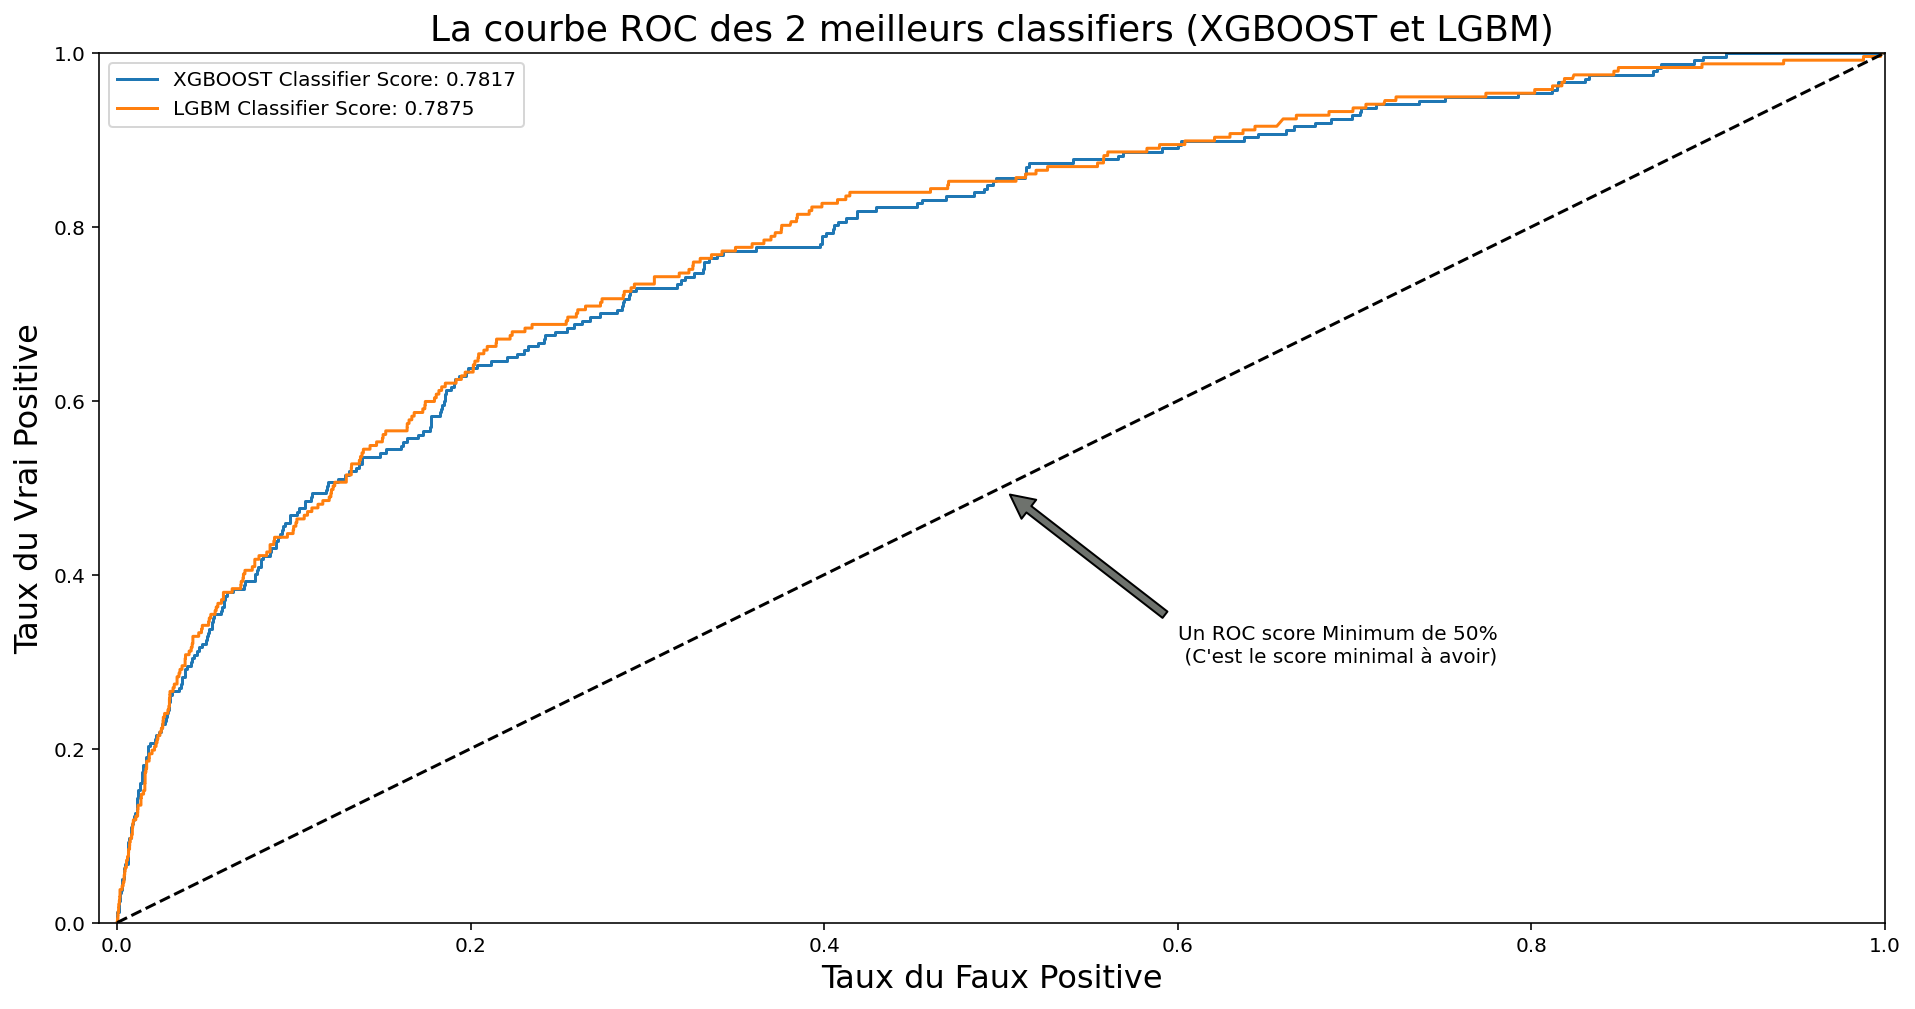

In [37]:
xgb_fpr, xgb_tpr, xgb_threshold = roc_curve(y_test, y_pred1[:,1])
lgbm_fpr, lgbm_tpr, lgbm_threshold = roc_curve(y_test, y_pred2[:,1])

graph_roc_curve_double(xgb_fpr, xgb_tpr, lgbm_fpr, lgbm_tpr)

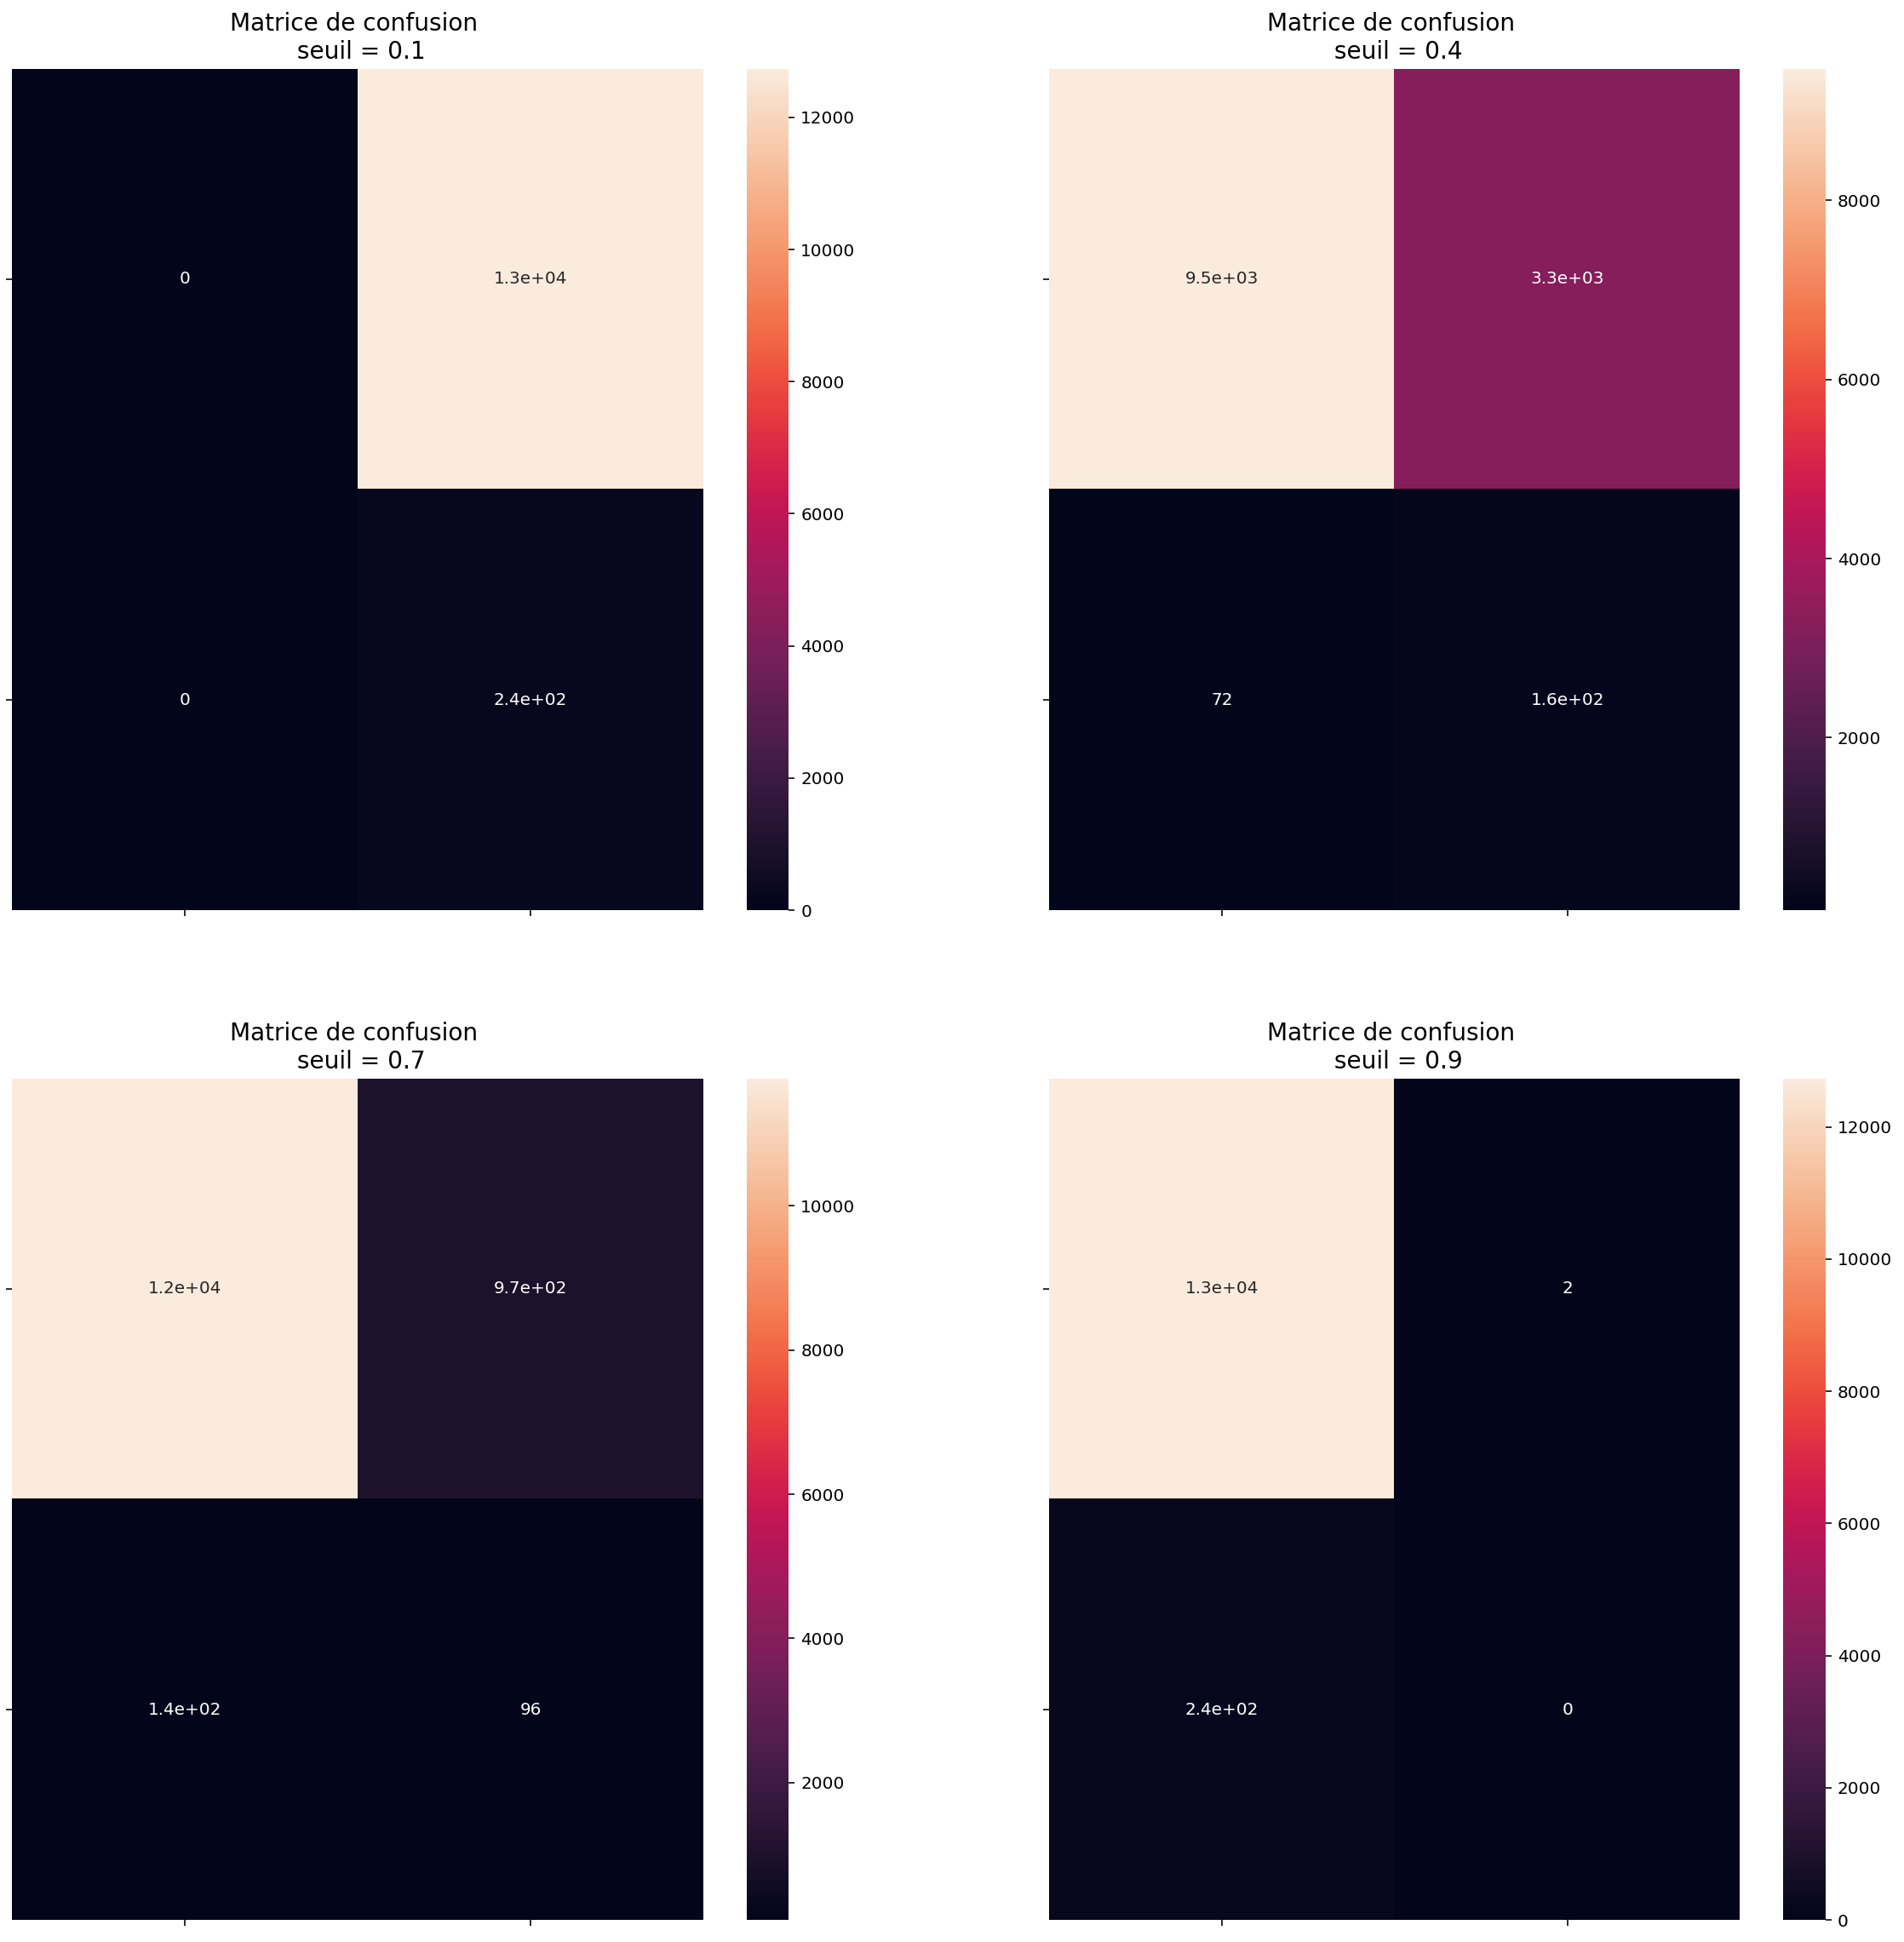

In [38]:
conf_matrix(y_pred2[:,1],y_test)

In [39]:
print(classification_report(y_test, (y_pred2[:,1]>0.5).astype(int)))

              precision    recall  f1-score   support

           0       0.99      0.85      0.92     12734
           1       0.06      0.55      0.12       237

    accuracy                           0.85     12971
   macro avg       0.53      0.70      0.52     12971
weighted avg       0.97      0.85      0.90     12971



Notre modèle a une très faible précision pour les fraudeurs (6%) c-à-d que sur 100 clients détéctés fraudeurs il y a que 6 qui le sont vraiment. En ce qui concerne le Recall, notre modèle réussi à détécter la moitié des fraudeurs (environ 54%). 